<a href="https://colab.research.google.com/github/jbarribal/KNN/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all necessary libraries

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap


Load the dataset through google drive

In [ ]:
url = 'https://drive.google.com/file/d/10Xl701YJqxdi6esqkOh648zWMCQ1P4O9/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path, delimiter = "\t")


In [ ]:
df

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


Visualize the count of each fruit using a bar chart

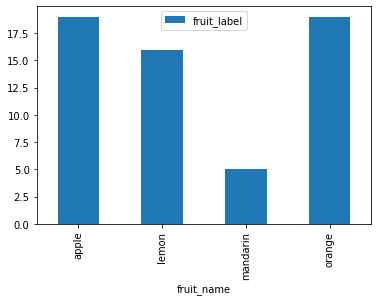

In [ ]:
vis = df.iloc[:,:2]
vis.groupby(['fruit_name']).count().plot.bar()


Visualize the location of each data point through a scatter plot.

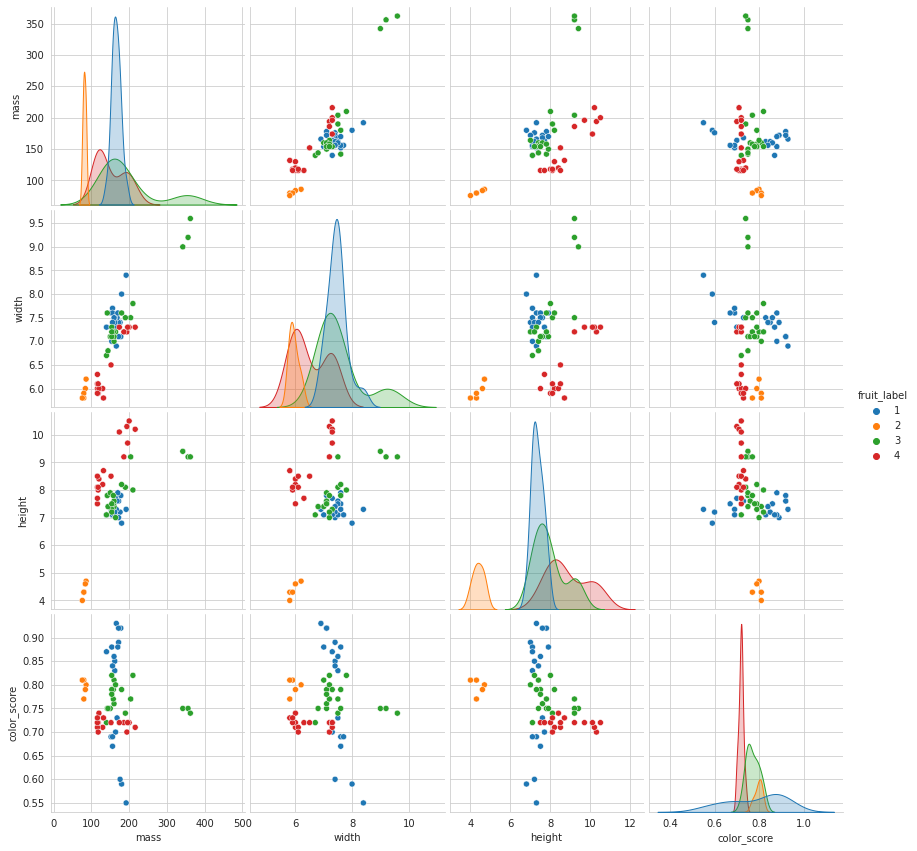

In [ ]:
mtp.close()
sns.set_style("whitegrid")
sns.pairplot(df, hue="fruit_label", height=3, kind = "scatter", palette='tab10')
mtp.show()

In [ ]:
x= df.iloc[:, 3:6].values  
y= df.iloc[:, 0].values


Create training and test sets and apply feature scale. Below is the guide. 


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=1)
scaler = MinMaxScaler() 
x_train= scaler.fit_transform(x_train)    
x_test= scaler.transform(x_test)

Build classifier model. 

In [ ]:
classifier= KNeighborsClassifier(n_neighbors=3, metric='euclidean', p=2 )
classifier.fit(x_train, y_train)  

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
y_pred= classifier.predict(x_test)  
y_pred

array([4, 1, 3, 4, 3, 1, 3, 1, 1, 4, 4, 2])

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9166666666666666


Predict using the values [[20, 4.3, 5.5]]

In [ ]:
sample1 = [[20,4.3,5.5]]

sample_pred =classifier.predict(sample1)
sample_pred


array([3])

Predict using another sample data point. 

In [ ]:
sample2 = [[90,6.7,7.2]]
sample_pred2 =classifier.predict(sample2)
sample_pred2

array([3])

In [ ]:
cm= confusion_matrix(y_test, y_pred)  
cm

array([[3, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 3, 0],
       [0, 0, 0, 4]])

Determine the sensitivity of the k-NN classification to obtain the ideal value of k. Run the script below. 

([<matplotlib.axis.XTick at 0x7f90d60394d0>,
 <a list of 5 Text major ticklabel objects>)

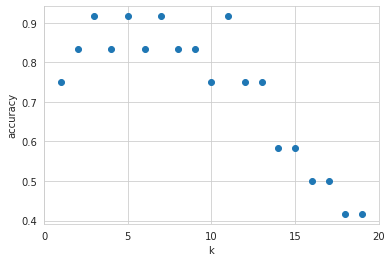

In [ ]:
k_range = range(1,20)
scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train,y_train)
  scores.append(knn.score(x_test,y_test))

mtp.figure()
mtp.xlabel('k')
mtp.ylabel('accuracy')
mtp.scatter(k_range,scores)
mtp.xticks([0,5,10,15,20])

Determine the sensitivity of the k-NN classification accuracy based on its train-test proportion. Run the script below. 


Text(0, 0.5, 'Accuracy')

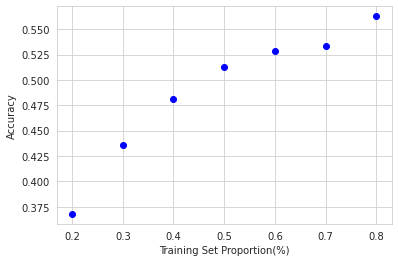

In [ ]:
t = [0.8,0.7,0.6,0.5,0.4,0.3,0.2]
knn= KNeighborsClassifier(n_neighbors=5)
mtp.figure()

for s in t:
  scores = []
  for i in range(1,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 1-s)
    knn.fit(x_train,y_train)
    scores.append(knn.score(x_test, y_test))

  mtp.plot(s,np.mean(scores),'bo')

mtp.xlabel('Training Set Proportion(%)')
mtp.ylabel('Accuracy')

    